In [1]:
import pandas as pd

train = pd.read_csv("./train.csv")

print(f"train set은 {train.shape[1]}개의 feature를 가진 {train.shape[0]}개의 데이터 샘플로 이루어져 있습니다.")

train.head()

train set은 15개의 feature를 가진 1350개의 데이터 샘플로 이루어져 있습니다.


,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [2]:
#결측치 있는지 확인하는 함수

def check_missing_col(dataframe):
    
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.\n')
            missing_col.append([col, dataframe[col].dtype])
    print(f'결측치가 있는 컬럼 의 개수는 {counted_missing_col} 입니다')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

    return missing_col

missing_col = check_missing_col(train)
print(missing_col)


결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다
[]


In [3]:
train.columns

Index(['id', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target'],
      dtype='object')

In [4]:
train.shape

(1350, 15)

In [11]:
x_feature = "Gr Liv Area"
y_feature = "target"

X = train[x_feature]
Y = train[y_feature]

In [12]:
X

0       2392
1       1352
2        900
3       1174
4       1958
        ... 
1345    1756
1346    2748
1347    1214
1348     894
1349     907
Name: Gr Liv Area, Length: 1350, dtype: int64

In [13]:
import numpy as np

X_mean = np.mean(X)
Y_mean = np.mean(Y)

In [14]:
relation = Y_mean/X_mean

In [16]:
# 파이썬 f-string 사용법 이 코드 좋은 듯

#print(f"train set은 {train.shape[1]}개의 feature를 가진 {train.shape[0]}개의 데이터 샘플로 이루어져 있습니다.")

print(f"{x_feature}의 평균 : {X_mean:.2f} \n {y_feature}의 평균 : {Y_mean:.2f}")
print(f"따라서 {y_feature}는 {x_feature}의 평균 {relation:.2f}배 입니다.")
print(f"즉, a = {relation :2f} 입니다.")

a = round(relation,2)
print(f"업데이트 된 방정식 : Y = {a:.2f} * X + b")

Gr Liv Area의 평균 : 1513.54 
 target의 평균 : 186406.31
따라서 target는 Gr Liv Area의 평균 123.16배 입니다.
즉, a = 123.158978 입니다.
업데이트 된 방정식 : Y = 123.16 * X + b


In [17]:
b = Y_mean - a*X_mean

In [18]:
print(f"b는 {b:.2f} 입니다")
print(f"업데이트 된 방정식 : Y = {a:.2f} * X + {b:.2f}")

b는 -1.55 입니다
업데이트 된 방정식 : Y = 123.16 * X + -1.55


In [23]:
predict_Y = a * X + b
predict_Y

0       294597.172504
1       166510.772504
2       110842.452504
3       144588.292504
4       241145.732504
            ...      
1345    216267.412504
1346    338442.132504
1347    149514.692504
1348    110103.492504
1349    111704.572504
Name: Gr Liv Area, Length: 1350, dtype: float64

In [20]:
# 이번 대회의 평가지표는 NMAE
# 우리가 예측한 값과 실제 값이 얼마나 차이가 나는지, 정규화된 오차의 평균의 평균(NMAE)값을 취한 것
# 즉, 정규화된 실제값과 예측값의 차이를 절대값으로 변환해 평균화 한 것


def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [25]:
real_answer = Y.copy()

error = NMAE(real_answer, predict_Y)

print(f"이 방정식의 평균 에러는 {error:.2f}입니다.")

이 방정식의 평균 에러는 0.20입니다.


In [26]:
test = pd.read_csv("./test.csv")
test.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991


In [27]:
test_X = test[x_feature]

predict_test = a * test_X + b

print(predict_test)

0       221686.452504
1       133257.572504
2       193729.132504
3       300878.332504
4       128084.852504
            ...      
1345    237943.572504
1346    112320.372504
1347    106039.212504
1348    176117.252504
1349    287823.372504
Name: Gr Liv Area, Length: 1350, dtype: float64


In [28]:
submission = pd.read_csv("./sample_submission.csv")
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [31]:
submission[y_feature] = predict_test
submission

,id,target
0,1,221686.452504
1,2,133257.572504
2,3,193729.132504
3,4,300878.332504
4,5,128084.852504
...,...,...
1345,1346,237943.572504
1346,1347,112320.372504
1347,1348,106039.212504
1348,1349,176117.252504


In [32]:
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
submission.to_csv("submission.csv", index=False)

# baseline EDA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('./train.csv')

data = data.drop('id', axis=1)
data 

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [2]:
#결측치 있는지 확인하는 함수

def check_missing_col(dataframe):
    
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.\n')
            missing_col.append([col, dataframe[col].dtype])
    print(f'결측치가 있는 컬럼 의 개수는 {counted_missing_col} 입니다')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

    return missing_col

missing_col = check_missing_col(data)
print(missing_col)


결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다
[]


In [3]:
data.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


In [4]:
data.dtypes

Overall Qual       int64
Gr Liv Area        int64
Exter Qual        object
Garage Cars        int64
Garage Area        int64
Kitchen Qual      object
Total Bsmt SF      int64
1st Flr SF         int64
Bsmt Qual         object
Full Bath          int64
Year Built         int64
Year Remod/Add     int64
Garage Yr Blt      int64
target             int64
dtype: object

In [13]:
#  왜 안되는지 모르겠음... 분명 전엔 됐는뎀..
# numeric_feature = data.columns[(data.dtypes == int) | (data.dtypes == float)]
numeric_feature = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', \
                   'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
categorical_feature = data.columns[data.dtypes == "O"]

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
카테고리형 데이터는 다음과 같습니다. 
 ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


# 수치형 데이터 시각화

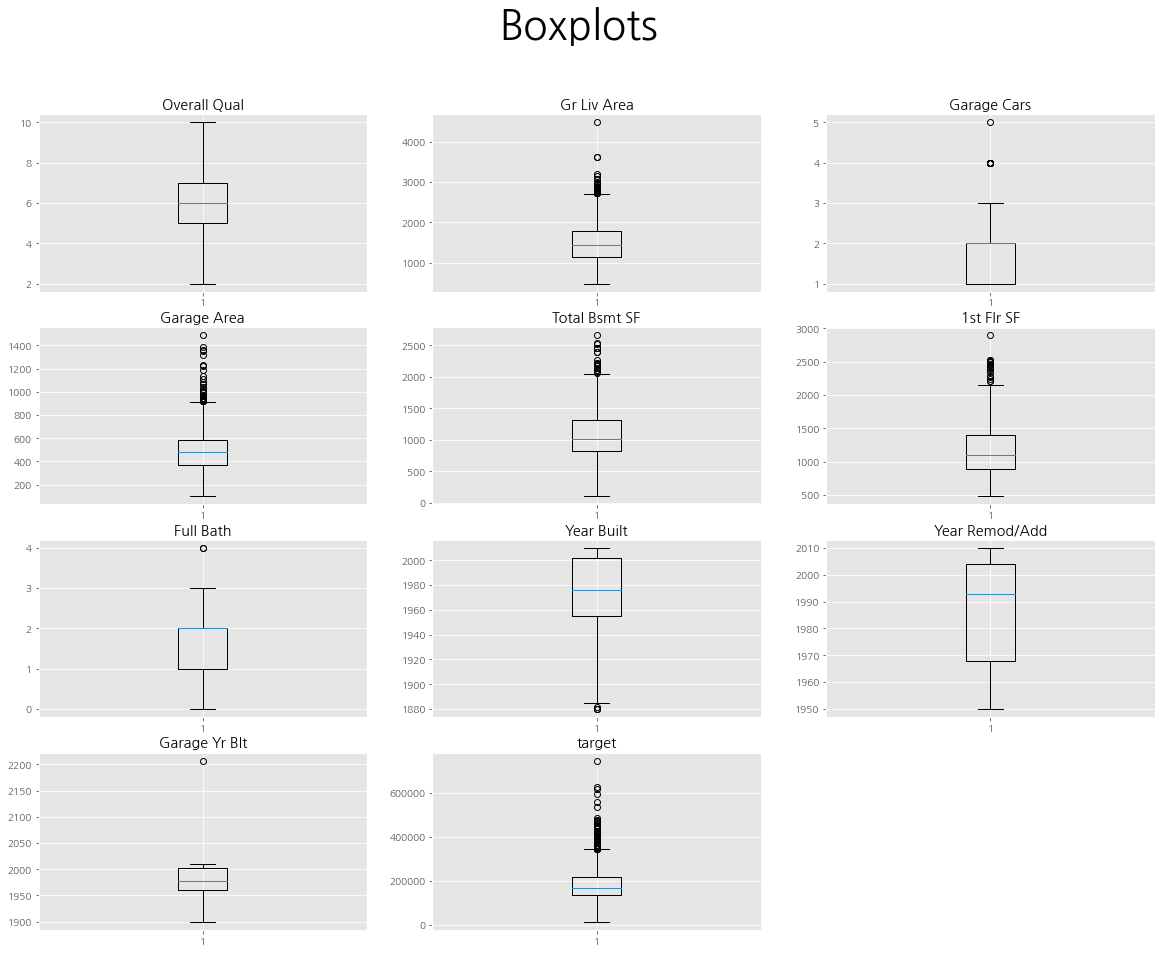

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

plt.figure(figsize = (20,15))
plt.suptitle("Boxplots", fontsize = 40)

for i in range(len(feature)):
    plt.subplot(4,3,i+1) # 수치형 데이터가 11개이므로 4*3 12개 자리가 필요
    plt.title(feature[i])
    plt.boxplot(data[feature[i]])
plt.show()

# 카테고리형 데이터 시각화

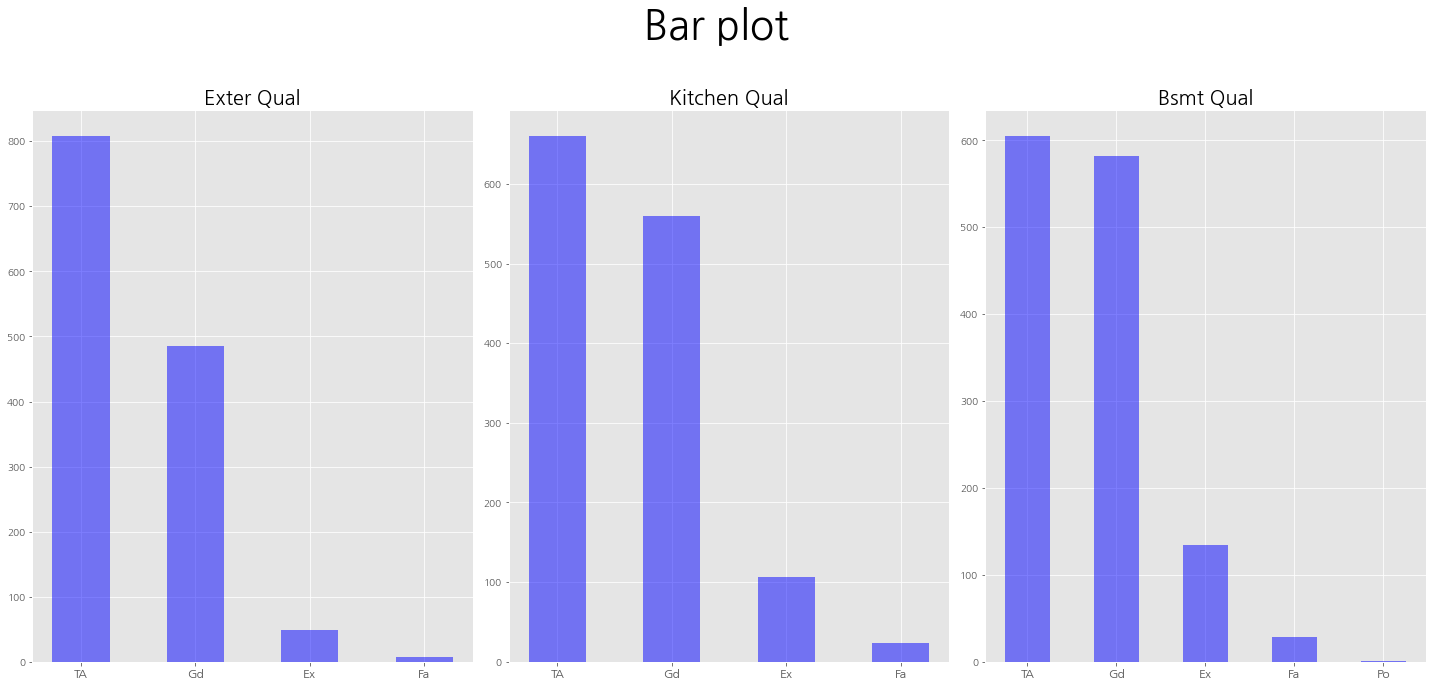

In [24]:
feature = categorical_feature

plt.figure(figsize = (20,10))
plt.suptitle("Bar plot", fontsize= 40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize = 20)
    temp = data[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width = 0.5, color = "b", alpha = 0.5)
    plt.xticks(temp.keys(), fontsize = 12)
plt.tight_layout(rect = [0,0.03,1,0.95])
plt.show()

In [19]:
data["Exter Qual"].value_counts()

TA    808
Gd    485
Ex     49
Fa      8
Name: Exter Qual, dtype: int64

# 상관관계 시각화

In [26]:
from sklearn.preprocessing import LabelEncoder

corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes == "O"]] = corr_df[corr_df.columns[corr_df.dtypes == "O"]].astype(str).apply(LabelEncoder().fit_transform)

In [30]:
a = data.copy()

In [37]:
a["Bsmt Qual"].apply(LabelEncoder().fit_transform)

# astype(str)로 바꿔주고 해야하나 보군

ValueError: y should be a 1d array, got an array of shape () instead.

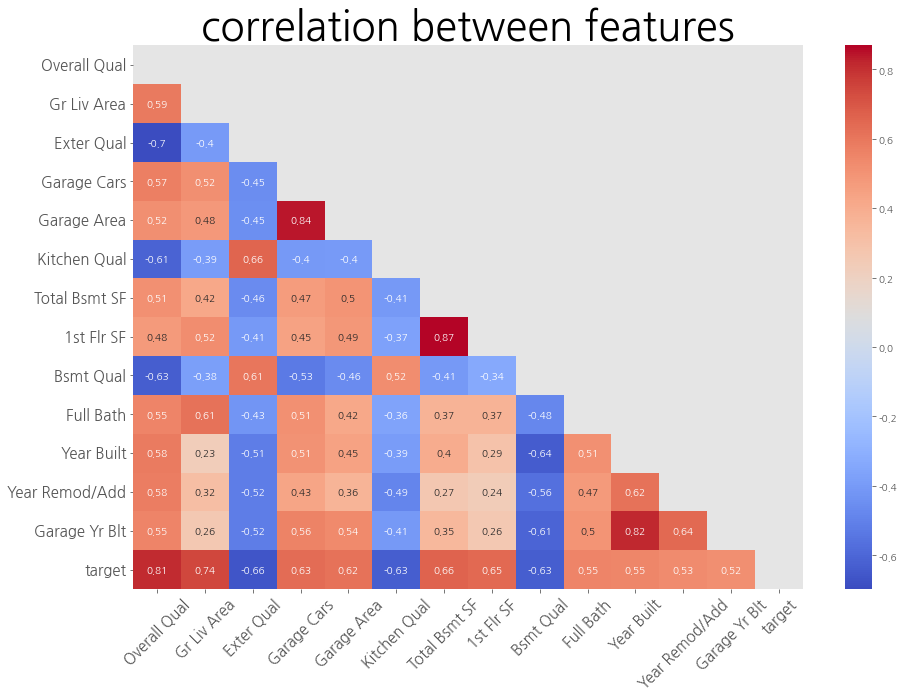

In [43]:
#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

# target과 다른 feature들과의 관계

In [44]:
target = "target"

In [46]:
numeric_feature

['Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 'Total Bsmt SF',
 '1st Flr SF',
 'Full Bath',
 'Year Built',
 'Year Remod/Add',
 'Garage Yr Blt',
 'target']

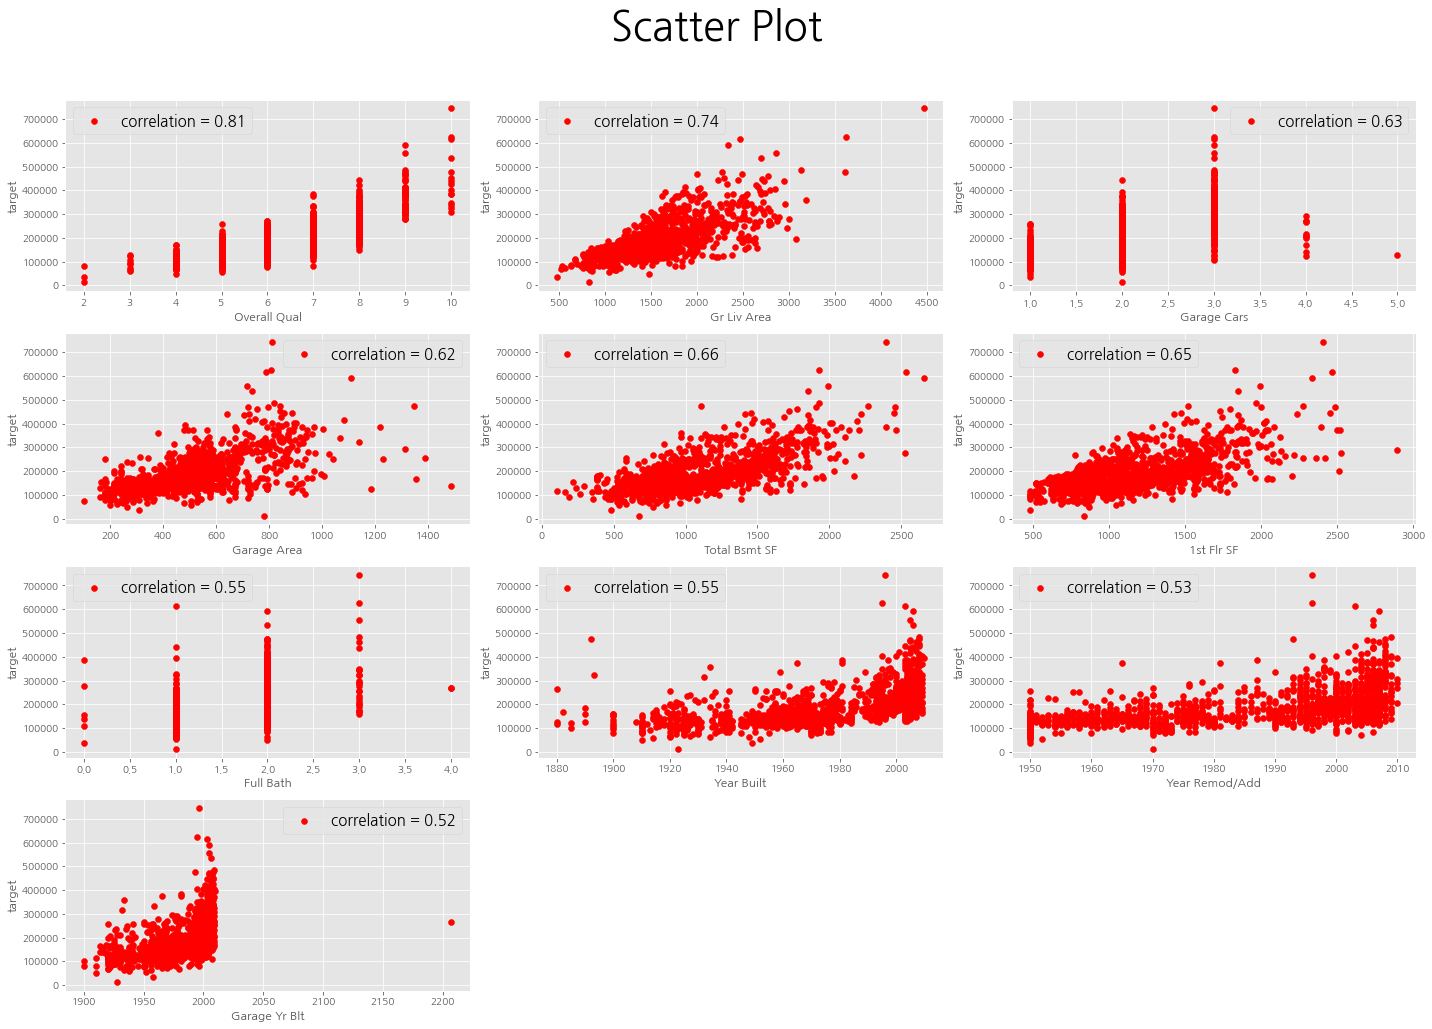

In [49]:
# 상관관계 그래프그리는법! 중요!

feature = numeric_feature

plt.figure(figsize=(20,15))
plt.suptitle("Scatter Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(feature[:-1])):
    plt.subplot(4,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = data[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(data[feature[i]], data[target], color=c, label=f"correlation = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# target과 카테고리형 feature으 ㅣ관계

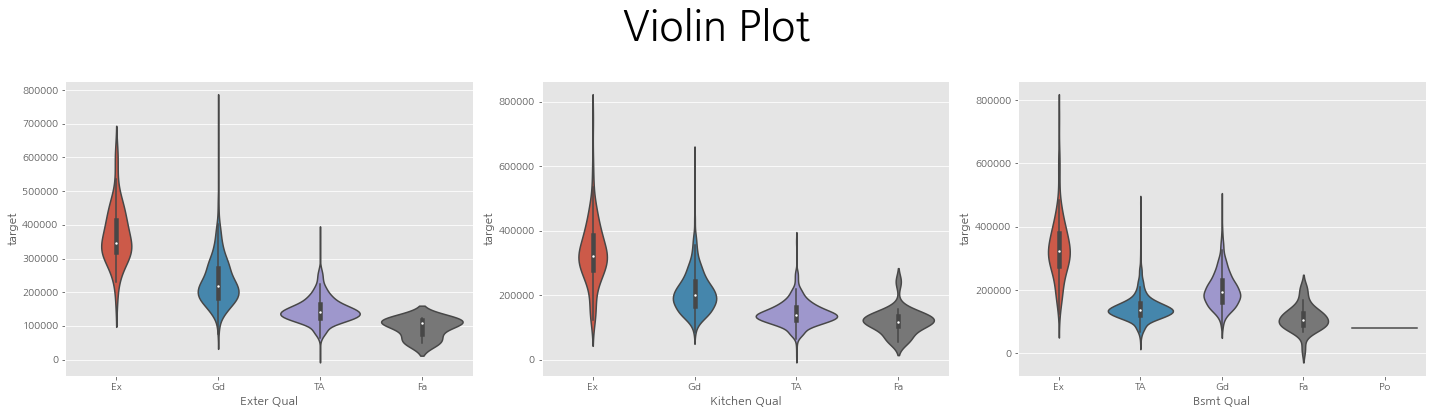

In [53]:
feature = categorical_feature

plt.figure(figsize=(20,6))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    sns.violinplot(x= data[feature[i]], y= data[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()